Multiclass classification
  -- Toy multi-class dataset

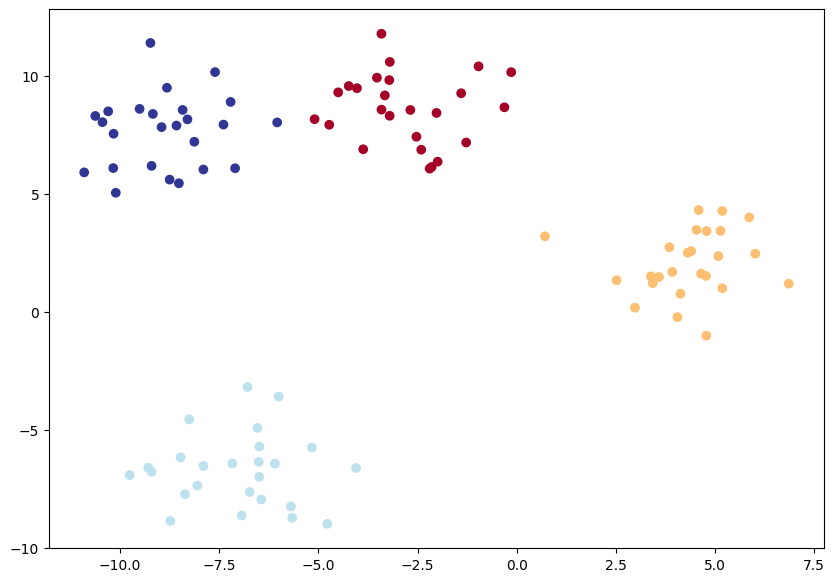

In [8]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multiclass data
X_blob, y_blob = make_blobs(n_samples=100,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
yX_blob = torch.from_numpy(y_blob).type(torch.float)

#3. Split into train, test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


Building multiclass classification in PyTorch

In [9]:
#Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input features (int)
      output features (int)
      hidden layers
    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, output_features=hidden_units),
        nn.Linear(in_features=hidden_units, output_features=hidden_units),
        nn.Linear(in_features=hidden_units, output_features=output_features)
    )

In [13]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([80, 2]), (80,))